In [13]:
from google.colab import files
uploaded = files.upload()

Saving altin_fiyatlari_2023_guncel.csv to altin_fiyatlari_2023_guncel (1).csv
Saving gumus_fiyatlari_2023_guncel.csv to gumus_fiyatlari_2023_guncel.csv


In [14]:
import pandas as pd

altin = pd.read_csv("altin_fiyatlari_2023_guncel.csv")
gumus = pd.read_csv("gumus_fiyatlari_2023_guncel.csv")


In [15]:
altin["Altın Günlük Değişim: %"] = altin["Gram Altın Fiyatı (TL)"].pct_change() *100
altin["Altın Günlük Kazanç: "] = altin["Gram Altın Fiyatı (TL)"].diff()

gumus["Gümüş Günlük Değişim: %"] = gumus["Gram Gümüş Fiyatı (TL)"].pct_change() *100
gumus["Gümüş Günlük Kazanç: "] = gumus["Gram Gümüş Fiyatı (TL)"].diff()



In [16]:
# Altın kazanç sütunundan toplam kazancı hesapla
altin_kazanc = altin["Günlük Kazanç"].sum()

# Eğer gümüş için bir sütun varsa, toplam kazanç hesaplanabilir
gumus_kazanc = gumus["Günlük Kazanç"].sum()  # "Günlük Kazanç" sütununun var olduğunu varsayıyoruz

# Yeni bir DataFrame oluştur ve sonuçları ekle
data = pd.DataFrame({
    "Altın Günlük Kazanç": [altin_kazanc],
    "Gümüş Günlük Kazanç": [gumus_kazanc]
})

# Sonuçları yazdır
print("Altın Günlük Kazanç:", altin_kazanc)
print("Gümüş Günlük Kazanç:", gumus_kazanc)


Altın Günlük Kazanç: 0.0
Gümüş Günlük Kazanç: 0.0


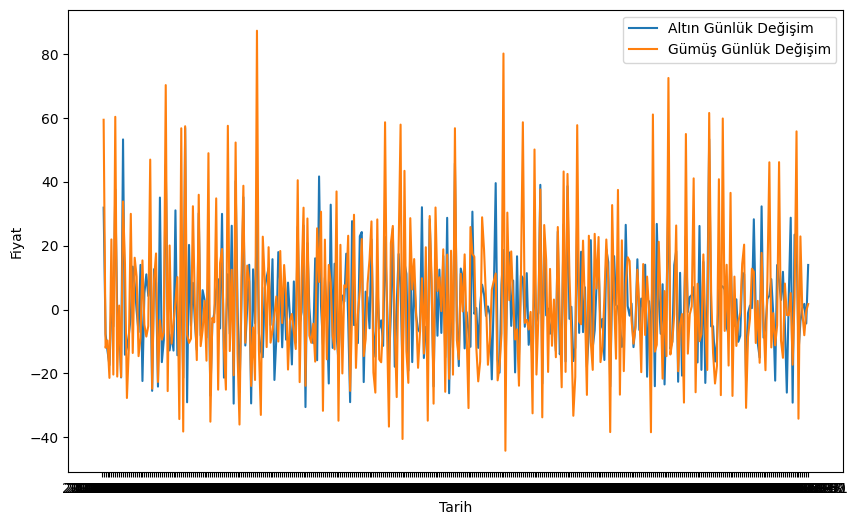

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(altin["Tarih"], altin["Altın Günlük Değişim: %"], label="Altın Günlük Değişim")
plt.plot(gumus["Tarih"], gumus["Gümüş Günlük Değişim: %"], label="Gümüş Günlük Değişim")

plt.xlabel("Tarih")
plt.ylabel("Fiyat")

plt.legend()
plt.show()